# Look at user timings

In [ ]:
import aptwitterlook
datadir = input('Data directory name> ')
tp = Aptwitterlook(datadir)
df = tp.read_tweets('{}/{}'.format(datadir, 'kamalaharrisdestroyed'))
users=tp.hunt_bots(df)

In [2]:
import pandas as pd
import json
import time
from snowflake import *
import matplotlib.pyplot as plt
%matplotlib inline

def get_timestamp(snowflake_id):
    timestamp, data_center, worker, sequence = melt(int(snowflake_id))
    # print('the tweet was created at {}'.format(local_datetime(timestamp)))
    return timestamp

In [3]:
# Get dataset
datadir = input('Data directory name> ')
with open('{}/tweets.json'.format(datadir)) as f:
    tweetjson = json.load(f)
print('We have {} tweets'.format(len(tweetjson)))
dftweets = pd.DataFrame(tweetjson, index=[0]).transpose().reset_index()
dftweets.rename(index=str, columns={'index': 'tweet_url', 0: 'text'}, inplace=True)
dftweets['user'] = dftweets['tweet_url'].str.split('/').str[3]
dftweets['tweet_id'] = dftweets['tweet_url'].str.split('/').str[5]
dftweets['timestamp'] = dftweets['tweet_id'].apply(get_timestamp)
dftweets['datetime'] = pd.to_datetime(dftweets['timestamp'],unit=dat'ms')
dftweets['date'] = dftweets['datetime'].dt.date
dftweets['hour'] = dftweets['datetime'].dt.hour
dftweets

Data directory name> data/kenya
We have 13619 tweets


,tweet_url,text,user,tweet_id,timestamp,datetime,date,hour
0,https://twitter.com/danielwaweru/status/114573...,RT @GacheriNdumba: Many expat type folks have ...,danielwaweru,1145735054007701507,1561999498260,2019-07-01 16:44:58.260,2019-07-01,16
1,https://twitter.com/cleophasoluoch/status/1145...,The last time Kenya faced Senegal was in 2004 ...,cleophasoluoch,1145735047204487169,1561999496638,2019-07-01 16:44:56.638,2019-07-01,16
2,https://twitter.com/curtlow_/status/1145735044...,RT @HemingwaysKE: We are delighted to sponsor ...,curtlow_,1145735044289486849,1561999495943,2019-07-01 16:44:55.943,2019-07-01,16
3,https://twitter.com/online_vampire/status/1145...,@KibetClinton_ @ciryan_nelson Goalless draw ke...,online_vampire,1145735037293334530,1561999494275,2019-07-01 16:44:54.275,2019-07-01,16
4,https://twitter.com/vutlhari_chuma/status/1145...,I cheer for the Lions of Teranga 🇸🇳 in this #T...,vutlhari_chuma,1145735028166582273,1561999492099,2019-07-01 16:44:52.099,2019-07-01,16
5,https://twitter.com/MuthuiMkenya/status/114573...,Make Kenya proud Harambee Stars. Tonight is th...,MuthuiMkenya,1145735026195279873,1561999491629,2019-07-01 16:44:51.629,2019-07-01,16
6,https://twitter.com/BenjaminnMwaka/status/1145...,RT @Infinite_254Ke: @EricNjiiru A tough one an...,BenjaminnMwaka,1145735010563100673,1561999487902,2019-07-01 16:44:47.902,2019-07-01,16
7,https://twitter.com/Mzinduzi/status/1145735008...,RT @Nanjala1: Welcome new followers. I wrote a...,Mzinduzi,1145735008583397377,1561999487430,2019-07-01 16:44:47.430,2019-07-01,16
8,https://twitter.com/JimmyMugoiyo/status/114573...,RT @RAbdiCG: My father served in Kenyan securi...,JimmyMugoiyo,1145735005437595650,1561999486680,2019-07-01 16:44:46.680,2019-07-01,16
9,https://twitter.com/anistrono/status/114573496...,RT @MigunaMiguna: Power is in our numbers. Fea...,anistrono,1145734968125140997,1561999477784,2019-07-01 16:44:37.784,2019-07-01,16


In [4]:
# List users tweeting suspicious number of times per day
usercounts = dftweets['user'].value_counts().reset_index()
usercounts[usercounts['user'] >= 72]

,index,user
0,kenya_pu,98
1,LincolnsKE,84
2,NofNews_Kenya,82


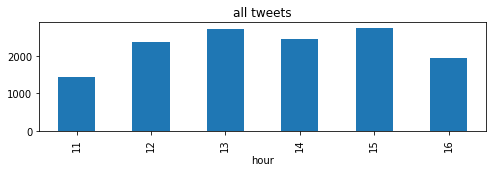

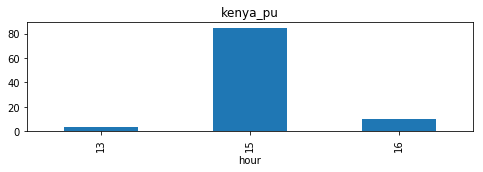

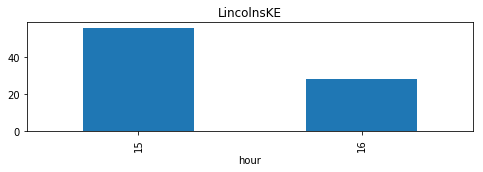

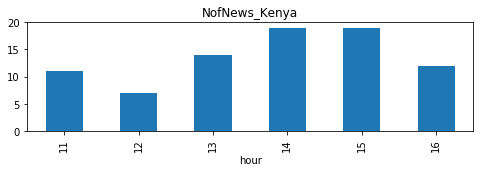

In [5]:
# look at those users' activities over time on this hashtag 
plt.figure(figsize=(8,2))
fig = dftweets.groupby(['hour'])['text'].count().plot.bar()
plt.title('all tweets')

for user in usercounts[usercounts['user'] >= 72]['index'].to_list():
    plt.figure(figsize=(8,2))
    fig = dftweets[dftweets['user'] == user].groupby(['hour'])['text'].count().plot.bar()
    plt.title(user)

In [13]:
# Look at daily output rates per user
tcounts = dftweets['text'].value_counts().reset_index()
cheertext = tcounts['index'][1]
print(cheertext)
dftweets[dftweets['text'] == cheertext]['user'].value_counts()

I cheer for the Harambee Stars 🇰🇪 in this #TotalAFCON2019 game against Senegal 🇸🇳 ! Go Kenya! #KENSEN #FootballTogether


mwaskev12          1
karegasam          1
clausmikaelson     1
mbuguakamau_       1
Abdi_theITguru     1
charoville         1
Shikoohz           1
Chore254           1
okumu_neville      1
melvin_ayioka      1
nivaasenath        1
mateli_lamax       1
MugambiKennedy2    1
PhilipMboya        1
olivia_juma        1
bunjosi            1
MarqueeKenya       1
JonnieMut          1
mutuoj             1
oruko_pius         1
Maraba67417379     1
PatrobasPaty       1
kiplangatdenis9    1
dennisKetone       1
ThisIsYassir       1
ArmyofGod001       1
shautosharon1      1
pgathambiri        1
BramUntamed        1
WNamunyak          1
                  ..
qualitynation      1
seppfavour         1
muchened           1
cee8cfc            1
Viennerick         1
Limo_alan          1
ochicalowi         1
isaac_kiptum       1
GodfreyKimanzi     1
MungahUnited       1
BAWCIE             1
MaxwellMuhanda     1
AndaliaLoneGray    1
NatembeaNgutuku    1
AkwapiKE           1
ItharaKenneth      1
Festus_clax  

## Worry about this part later

In [7]:
tnames = ['Aliza_PTI', 'DavideFurman', 'EinsteinMaga', 'Gracecourtwrig3', 'jl_orozco88', 'JulieReichwein1', 
          'Lavonne49242314', 'O_IrishT', 'ShirleyRinguet5']
for tname in tnames: 
    tfile = '../twitter_scraper_code/2019_02_trollbots/@{}/tweets.json'.format(tname)
    with open(tfile) as f:
        data = json.load(f)

    tweettimes = [get_timestamp(int(s[s.rfind('/')+1:])) for s in list(data.keys())]
    tweetnext = tweettimes[1:] + [tweettimes[-1]]
    df = pd.DataFrame(tweettimes, columns=['raw'])
    df['tnext'] = tweetnext
    df['tgap'] = (df['tnext'] - df['raw'])/1000
    plt.figure(figsize=(15,2))
    df['raw'].hist(bins=50)
#     plt.figure(figsize=(15,3))
#     df['tgap'].hist(bins=50)

FileNotFoundError: [Errno 2] No such file or directory: '../twitter_scraper_code/2019_02_trollbots/@Aliza_PTI/tweets.json'

In [ ]:
df